<h1><font size=12>
Weather Derivatites </h1>
<h1> Rainfall Simulator -- Final Modelling + Pricing <br></h1>

Developed by [Jesus Solano](mailto:ja.solano588@uniandes.edu.co) <br>  
16 November 2018 


In [1]:
# Import needed libraries. 
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from scipy.stats import gamma
import pickle
import time
import datetime
from scipy import stats

# Generate artificial Data

In [2]:
### ENSO probabilistic forecast.

# Open saved data.
ensoForecast = pickle.load(open('../datasets/ensoForecastProb/ensoForecastProbabilities.pickle','rb'))

# Print an example .. ( Format needed)

ensoForecast['2017-01']

,Season,La Niña,Neutral,El Niño
0,JFM 2017,13%,86%,1%
1,FMA 2017,7%,90%,3%
2,MAM 2017,4%,89%,7%
3,AMJ 2017,5%,80%,15%
4,MJJ 2017,11%,63%,26%
5,JJA 2017,13%,53%,34%
6,JAS 2017,14%,48%,38%
7,ASO 2017,19%,44%,37%
8,SON 2017,22%,39%,39%


In [3]:
### Create total dataframe.

def createTotalDataFrame(daysNumber, startDate , initialState , initialPrep , ensoForecast, optionMonthTerm ):
    # Set variables names.
    totalDataframeColumns = ['state','Prep','Month','probNina','probNino', 'nextState']

    # Create dataframe.

    allDataDataframe = pd.DataFrame(columns=totalDataframeColumns) 

    # Number of simulation days(i.e 30, 60)
    daysNumber = daysNumber

    # Simulation start date ('1995-04-22')
    startDate = startDate

    # State of rainfall last day before start date --> Remember 0 means dry and 1 means wet.
    initialState = initialState
    initialPrep = initialPrep   # Only fill when initialState == 1  


    dates = pd.date_range(startDate, periods = daysNumber + 2 , freq='D')

    for date in dates: 

        # Fill precipitation amount.
        allDataDataframe.loc[date.strftime('%Y-%m-%d'),'Prep'] = np.nan

        # Fill month of date 
        allDataDataframe.loc[date.strftime('%Y-%m-%d'),'Month'] = date.month
        
        tempDate = None
        if optionMonthTerm==1:
            tempDate = date 
        else:
            tempDate = date - pd.DateOffset(months=optionMonthTerm-1)
        
        # Fill El Nino ENSO forecast probability. 
        allDataDataframe.loc[date.strftime('%Y-%m-%d'),'probNino'] = float(ensoForecast[tempDate.strftime('%Y-%m')].loc[optionMonthTerm-1,'El Niño'].strip('%').strip('~'))/100

        # Fill La Nina ENSO forecast probability. 
        allDataDataframe.loc[date.strftime('%Y-%m-%d'),'probNina'] = float(ensoForecast[tempDate.strftime('%Y-%m')].loc[optionMonthTerm-1,'La Niña'].strip('%').strip('~'))/100

        # Fill State. 
        allDataDataframe.loc[date.strftime('%Y-%m-%d'),'state'] = np.nan


    simulationDataFrame = allDataDataframe[:-1]

    # Fill initial conditions. 
    simulationDataFrame['state'][0] = initialState
    if initialState == 1:
        simulationDataFrame['Prep'][0] = initialPrep
    else:
        simulationDataFrame['Prep'][0] = 0.0
    
    return simulationDataFrame

simulationDataFrame = createTotalDataFrame(daysNumber= 30, startDate = '2005-01-01', initialState = 1 , initialPrep =  0.4, ensoForecast = ensoForecast, optionMonthTerm=6)
simulationDataFrame

/home/jesus/.local/lib/python3.5/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,state,Prep,Month,probNina,probNino,nextState
2005-01-01,1,0.4,1,0.03,0.4,NaN
2005-01-02,NaN,NaN,1,0.03,0.4,NaN
2005-01-03,NaN,NaN,1,0.03,0.4,NaN
2005-01-04,NaN,NaN,1,0.03,0.4,NaN
2005-01-05,NaN,NaN,1,0.03,0.4,NaN
2005-01-06,NaN,NaN,1,0.03,0.4,NaN
2005-01-07,NaN,NaN,1,0.03,0.4,NaN
2005-01-08,NaN,NaN,1,0.03,0.4,NaN
2005-01-09,NaN,NaN,1,0.03,0.4,NaN
2005-01-10,NaN,NaN,1,0.03,0.4,NaN


In [4]:
### Load transitions and amount parameters.

# Transitions probabilites.
transitionsParametersDry = pd.read_csv('../results/visibleMarkov/transitionsParametersDry.csv', sep = ' ', header=None, names = ['variable', 'value'])
transitionsParametersDry.index += 1 
transitionsParametersDry

transitionsParametersWet = pd.read_csv('../results/visibleMarkov/transitionsParametersWet.csv', sep = ' ', header=None, names = ['variable', 'value'])
transitionsParametersWet.index += 1 
transitionsParametersWet

amountParametersGamma = pd.read_csv('../results/visibleMarkov/amountGammaPro.csv', sep = ' ', header=None, names = ['variable', 'mu', 'shape'])
amountParametersGamma.index += 1 

print(transitionsParametersDry)

print('\n * Intercept means firts month (January) ')


       variable     value
1   (Intercept) -1.168017
2        Month2  0.346713
3        Month3  0.848934
4        Month4  1.563185
5        Month5  1.567584
6        Month6  1.132592
7        Month7  1.311161
8        Month8  1.432857
9        Month9  0.924944
10      Month10  1.587704
11      Month11  1.356612
12      Month12  0.518480
13     probNino -0.453497
14     probNina  0.176919

 * Intercept means firts month (January) 


## Simulation Function Core

In [5]:
### Build the simulation core.

# Updates the state of the day based on yesterday state. 
def updateState(yesterdayIndex, simulationDataFrame, transitionsParametersDry, transitionsParametersWet):
    
    # Additional data of day.
    yesterdayState = simulationDataFrame['state'][yesterdayIndex]
    yesterdayPrep = simulationDataFrame['Prep'][yesterdayIndex]
    yesterdayProbNino = simulationDataFrame['probNino'][yesterdayIndex]
    yesterdayProbNina = simulationDataFrame['probNina'][yesterdayIndex]
    yesterdayMonth = simulationDataFrame['Month'][yesterdayIndex]
    
    # Calculate transition probability.
    if yesterdayState == 0:
        # Includes month factor + probNino value + probNino value.
        successProbabilityLogit = transitionsParametersDry['value'][1]+transitionsParametersDry['value'][yesterdayMonth] + yesterdayProbNino*transitionsParametersDry['value'][13] +  yesterdayProbNina*transitionsParametersDry['value'][14]
              
        if yesterdayMonth==1: 
            # Includes month factor + probNino value + probNino value.
            successProbabilityLogit = transitionsParametersDry['value'][yesterdayMonth] + yesterdayProbNino*transitionsParametersDry['value'][13] +  yesterdayProbNina*transitionsParametersDry['value'][14]
            
        successProbability = (np.exp(successProbabilityLogit))/(1+np.exp(successProbabilityLogit)) 
        
    elif yesterdayState == 1:
        # Includes month factor + probNino value + probNino value + prep value .
        successProbabilityLogit = transitionsParametersDry['value'][1]+ transitionsParametersDry['value'][yesterdayMonth] + yesterdayProbNino*transitionsParametersWet['value'][14] +  yesterdayProbNina*transitionsParametersWet['value'][15] + yesterdayPrep*transitionsParametersWet['value'][13] 
        
        if yesterdayMonth==1:
            # Includes month factor + probNino value + probNino value + prep value .
            successProbabilityLogit = transitionsParametersDry['value'][yesterdayMonth] + yesterdayProbNino*transitionsParametersWet['value'][14] +  yesterdayProbNina*transitionsParametersWet['value'][15] + yesterdayPrep*transitionsParametersWet['value'][13] 
        
        successProbability = (np.exp(successProbabilityLogit))/(1+np.exp(successProbabilityLogit))    
    else:
        print('State of date: ', simulationDataFrame.index[yesterdayIndex],' not found.')
    
    #print(successProbability)
    #successProbability = monthTransitions['p'+str(yesterdayState)+'1'][yesterdayMonth] 
    
    todayState = bernoulli.rvs(successProbability)
    
    return todayState 

In [6]:
# Simulates one run of simulation. 
def oneRun(simulationDataFrame, transitionsParametersDry, transitionsParametersWet, amountParametersGamma):
    
    # Define the total rainfall amount over the simulation.
    rainfall = 0
    
    # Total rainfall days.
    wetDays = 0
    
    # Loop over days in simulation to calculate rainfall ammount.
    for day in range(1,len(simulationDataFrame)):
        
        # Get today date. 
        dateOfDay = datetime.datetime.strptime(simulationDataFrame.index[day],'%Y-%m-%d')
       
    
        # Update today state based on the yesterday state. 
        todayState = updateState(day-1, simulationDataFrame, transitionsParametersDry, transitionsParametersWet)
        
        # Write new day information.
        simulationDataFrame['state'][day] = todayState
        simulationDataFrame['nextState'][day-1] = todayState
        
        # Computes total accumulated rainfall.
        if todayState == 1:
            
            # Sum wet day.
            wetDays+=1
            
            # Additional data of day.
            todayProbNino = simulationDataFrame['probNino'][day]
            todayProbNina = simulationDataFrame['probNina'][day]
            todayMonth = simulationDataFrame['Month'][day]
            
            
            
            # Calculates gamma log(mu).
            gammaLogMu = amountParametersGamma['mu'][1] + amountParametersGamma['mu'][todayMonth]+ todayProbNino*amountParametersGamma['mu'][13]+todayProbNino*amountParametersGamma['mu'][13] 
            #print(gammaMu)
            # Calculates gamma scale
            gammaLogShape = amountParametersGamma['shape'][1] + amountParametersGamma['shape'][todayMonth]+ todayProbNino*amountParametersGamma['shape'][13]+todayProbNino*amountParametersGamma['shape'][13]
            #print(gammaShape)
            
            if todayMonth==1:
                # Calculates gamma log(mu).
                gammaLogMu =  amountParametersGamma['mu'][todayMonth]+ todayProbNino*amountParametersGamma['mu'][13]+todayProbNino*amountParametersGamma['mu'][13] 
                #print(gammaMu)
                # Calculates gamma scale
                gammaLogShape = amountParametersGamma['shape'][todayMonth]+ todayProbNino*amountParametersGamma['shape'][13]+todayProbNino*amountParametersGamma['shape'][13]
                #print(gammaShape)
            
            # Update mu
            gammaMu = np.exp(gammaLogMu)
            
            # Update shape
            gammaShape = np.exp(gammaLogShape)
            
            # Calculate gamma scale.
            gammaScale = gammaMu / gammaShape
            
            # Generate random rainfall.
            todayRainfall = gamma.rvs(a = gammaShape, scale = gammaScale)    
            
            # Write new day information.
            simulationDataFrame['Prep'][day] = todayRainfall
            
            # Updates rainfall amount. 
            rainfall += todayRainfall
            
        else:
            # Write new day information.
            simulationDataFrame['Prep'][day] = 0
            
        
        yesterdayState = todayState
            
    
    return rainfall,wetDays

## Complete Simulation

In [50]:
# Run total iterations.
def totalRun(simulationDataFrame, transitionsParametersDry, transitionsParametersWet, amountParametersGamma,iterations):
    
    # Initialize time 
    startTime = time.time()
    
    # Array to store all precipitations.
    rainfallPerIteration = [None]*iterations
    
    wetDaysPerIteration = [None]*iterations
    
    # Loop over each iteration(simulation)
    
    for i in range(iterations):
        
        simulationDataFrameC = simulationDataFrame.copy()
        
        iterationRainfall,wetDays = oneRun(simulationDataFrameC, transitionsParametersDry, transitionsParametersWet, amountParametersGamma)
        
        rainfallPerIteration[i] = iterationRainfall
        
        wetDaysPerIteration[i] = wetDays
    
    # Calculate time
    currentTime = time.time() - startTime 
    
    # Print mean of wet days. 
    
    #print('The mean of wet days is: ', np.mean(wetDaysPerIteration))
    
    # Logging time.
    #print('The elapsed time over simulation is: ', currentTime, ' seconds.')
    
    return rainfallPerIteration

# Financial Analysis

In [57]:
def calculatePrice(strikePrice, interestRate, finalSimulationData):
    
    presentValueArray = [0]*len(finalSimulationData)
    
    for i in range(len(finalSimulationData)):
        tempDiff = finalSimulationData[i]-strikePrice
        
        realDiff = max(0,tempDiff)
        
        presentValue = realDiff*np.exp(-interestRate/12)
        
        presentValueArray[i] = presentValue 
    
    #print('The option price should be: \n ' , np.mean(presentValueArray))
    return np.mean(presentValueArray)

# Final Results

In [58]:
def plotRainfallDistribution(rainfallSimulated):
  
    # Create Figure.
    fig = plt.figure(figsize=(20, 10))

    # Plot histogram.
    plt.hist(rainfallSimulated,facecolor='steelblue',bins=100, density=True,
           histtype='stepfilled', edgecolor = 'black' , hatch = '+')

    # Add axis names.
    plt.title('Rainfall Simulation')
    plt.xlabel('Rainfall Amount [mm]')
    plt.ylabel('Probability ')
    plt.grid()
    plt.show()

In [59]:
def optionRainfallCalculator(iterations, startDate, transitionsParametersDry, transitionsParametersWet, amountParametersGamma, optionMonthTerm):
  
    ## Generates initial conditions.
  
    # Defines initial state based on proportions.
    successProbability = 0.5
    initialState = bernoulli.rvs(successProbability) 

    # Calculates initial prepicipitation.
    if initialState == 1:
        initialPrep = 1.0
    else:
        initialPrep = 0.0

    ## Create dataframe to simulate. 
    simulationDataFrame = createTotalDataFrame(daysNumber= 30, startDate = startDate, initialState = initialState , initialPrep =  initialPrep, ensoForecast = ensoForecast, optionMonthTerm = optionMonthTerm)

    ## Run all iterations.
    rainfallPerIteration = totalRun(simulationDataFrame, transitionsParametersDry, transitionsParametersWet, amountParametersGamma,iterations)

    ## Plot histogram.

    #plotRainfallDistribution(rainfallPerIteration)

    ## Print Statistics.

    #print(stats.describe(rainfallPerIteration))

    return rainfallPerIteration

# Basic Simulation

## Simulation Function Core

In [96]:
### Build the simulation core.

# Updates the state of the day based on yesterday state. 
def updateState_S(yesterdayDate, yesterdayState, monthTransitions):
    
    yesterdayMonth = yesterdayDate.month
    
    successProbability = monthTransitions['p'+str(yesterdayState)+'1'][yesterdayMonth]
    
    todayState = bernoulli.rvs(successProbability)
    
    return todayState

# Simulates one run of simulation. 
def oneRun_S(daysNumber, startDate, initialState, monthTransitions,fittedGamma):
    
    # Create a variable to store the last day state.
    yesterdayState = initialState
    
    # Generate a timestamp with all days in simulation.
    dates = pd.date_range(startDate, periods=daysNumber, freq='D')
    
    # Define the total rainfall amount over the simulation.
    rainfall = 0
    
    # Loop over days in simulation to calculate rainfall ammount.
    for day in dates:
        
        # Update today state based on the yesterday state. 
        todayState = updateState_S(day-1, yesterdayState, monthTransitions)
        
        # Computes total accumulated rainfall.
        if todayState == 1:
            
            todayRainfall = gamma.rvs(fittedGamma['Shape'][0],fittedGamma['Loc'][0],fittedGamma['Scale'][0])
            
            # Updates rainfall amount. 
            rainfall += todayRainfall
        
        yesterdayState = todayState
            
        
    return rainfall
    

## Complete Simulation

In [97]:
# Run total iterations.
def totalRun_S(daysNumber,startDate,initialState, monthTransitionsProb,fittedGamma,iterations):
    
    # Initialize time 
    startTime = time.time()
    
    # Array to store all precipitations.
    rainfallPerIteration = [None]*iterations
    
    
    # Loop over each iteration(simulation)
    
    for i in range(iterations):
        
        iterationRainfall = oneRun_S(daysNumber,startDate,initialState, monthTransitionsProb,fittedGamma)
        
        rainfallPerIteration[i] = iterationRainfall
    
    # Calculate time
    currentTime = time.time() - startTime 
    
    # Logging time.
    print('The elapsed time over simulation is: ', currentTime, ' seconds.')
    
    return rainfallPerIteration

In [98]:
#### Define parameters simulation.

# Simulations iterations.
iterations = 1000

# Transitions probabilites.
monthTransitionsProb = pd.read_csv('../results/visibleMarkov/monthTransitions.csv', index_col=0)

# Rainfall amount parameters( Gamma parameters)
fittedGamma = pd.read_csv('../results/visibleMarkov/fittedGamma.csv', index_col=0)

# Number of simulation days(i.e 30, 60)
daysNumber = 30

# Simulation start date ('1995-04-22')
startDate = '2018-08-18'

# State of rainfall last day before start date --> Remember 0 means dry and 1 means wet.
initialState = 1

In [99]:
def optionRainfallCalculator_S(iterations, startDate,initialState, monthTransitionsProb,fittedGamma, optionMonthTerm):
  
    ## Generates initial conditions.
  
    # Defines initial state based on proportions.
    successProbability = 0.5
    initialState = bernoulli.rvs(successProbability) 

    # Calculates initial prepicipitation.
    if initialState == 1:
        initialPrep = 1.0
    else:
        initialPrep = 0.0

    ## Create dataframe to simulate. 
    simulationDataFrame = createTotalDataFrame(daysNumber= 30, startDate = startDate, initialState = initialState , initialPrep =  initialPrep, ensoForecast = ensoForecast, optionMonthTerm = optionMonthTerm)
    
    daysNumber = 30 
    ## Run all iterations.
    rainfallPerIteration = totalRun_S(daysNumber,startDate,initialState, monthTransitionsProb,fittedGamma,iterations)

    ## Plot histogram.

    #plotRainfallDistribution(rainfallPerIteration)

    ## Print Statistics.

    #print(stats.describe(rainfallPerIteration))

    return rainfallPerIteration

# Get USD Libor

In [60]:
liborUSD2017 = [0.77333, 0.82000, 0.99872, 1.3176]
# [1m, 3m, 6m, 12m ]

# Plotting final results

In [100]:
def finalComparison(iterations, startDate, transitionsParametersDry, transitionsParametersWet, amountParametersGamma, strikePrices, interestRates):
    fig = plt.figure(figsize=(20, 10))
    for strikePrice in strikePrices:
        rainfallOptionTo={}
        pricePerOption =  {}
        for optionMonthTerm in range(1,8):
            rainfallOptionTo[optionMonthTerm] = optionRainfallCalculator(iterations, startDate, transitionsParametersDry, transitionsParametersWet, amountParametersGamma, optionMonthTerm)
            interestRate = interestRates
            pricePerOption[optionMonthTerm] = calculatePrice(strikePrice, interestRate, rainfallOptionTo[optionMonthTerm])
        
        plotList = list(pricePerOption.values())
        
        # Create Figure.
        

        '''
        # Plot histogram.
        plt.hist(rainfallSimulated,facecolor='steelblue',bins=100, density=True,
               histtype='stepfilled', edgecolor = 'black' , hatch = '+')
        '''
        x = range(1,8)
        
        plt.plot(x,plotList, label='Strike Price ='+ str(strikePrice))
        
    # Add axis names.
    plt.title('Rainfall Option Simulation')
    plt.xlabel('Month')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

In [101]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

def finalComparisonGraph(iterations, startDate, transitionsParametersDry, transitionsParametersWet, amountParametersGamma, strikePrices, interestRates):
    
    plt.figure(figsize=(20, 10))
    host = host_subplot(111, axes_class=AA.Axes)
    plt.subplots_adjust(right=0.75)
    count =1
    
    for strikePrice in strikePrices:
        rainfallOptionTo={}
        pricePerOption =  {}
        for optionMonthTerm in range(1,8):
            rainfallOptionTo[optionMonthTerm] = optionRainfallCalculator(iterations, startDate, transitionsParametersDry, transitionsParametersWet, amountParametersGamma, optionMonthTerm)
            interestRate = interestRates
            pricePerOption[optionMonthTerm] = calculatePrice(strikePrice, interestRate, rainfallOptionTo[optionMonthTerm])
        
        
        plotList = list(pricePerOption.values())
        
        # Create Figure.
        par = host.twinx()
        
        offset = 45
        new_fixed_axis = par.get_grid_helper().new_fixed_axis
        par.axis["right"] = new_fixed_axis(loc="right", axes=par,
                                        offset=(offset*count, 0))
        
        par.axis["right"].toggle(all=True)
        
        par.set_ylabel('Price')
        '''
        # Plot histogram.
        plt.hist(rainfallSimulated,facecolor='steelblue',bins=100, density=True,
               histtype='stepfilled', edgecolor = 'black' , hatch = '+')
        '''
        x = range(1,8)
        
        p, =par.plot(x,plotList, label='Strike Price ='+ str(strikePrice))
        
        par.axis['right'].label.set_color(p.get_color())
        
        count+=1
    # Add axis names.
    plt.title('Rainfall Option Simulation')
    plt.xlabel('Month')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

In [90]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

def finalComparisonGraph_S(iterations, startDate,initialState, monthTransitionsProb,fittedGamma, strikePrices, interestRates):
    
    plt.figure(figsize=(20, 10))
    host = host_subplot(111, axes_class=AA.Axes)
    plt.subplots_adjust(right=0.75)
    count =1
    
    for strikePrice in strikePrices:
        rainfallOptionTo={}
        pricePerOption =  {}
        for optionMonthTerm in range(1,8):
            rainfallOptionTo[optionMonthTerm] = optionRainfallCalculator_S(iterations, startDate, transitionsParametersDry, transitionsParametersWet, amountParametersGamma, optionMonthTerm)
            interestRate = interestRates
            pricePerOption[optionMonthTerm] = calculatePrice(strikePrice, interestRate, rainfallOptionTo[optionMonthTerm])
        
        
        plotList = list(pricePerOption.values())
        
        # Create Figure.
        par = host.twinx()
        
        offset = 45
        new_fixed_axis = par.get_grid_helper().new_fixed_axis
        par.axis["right"] = new_fixed_axis(loc="right", axes=par,
                                        offset=(offset*count, 0))
        
        par.axis["right"].toggle(all=True)
        
        par.set_ylabel('Price')
        '''
        # Plot histogram.
        plt.hist(rainfallSimulated,facecolor='steelblue',bins=100, density=True,
               histtype='stepfilled', edgecolor = 'black' , hatch = '+')
        '''
        x = range(1,8)
        
        p, =par.plot(x,plotList, label='Strike Price ='+ str(strikePrice))
        
        par.axis['right'].label.set_color(p.get_color())
        
        count+=1
    # Add axis names.
    plt.title('Rainfall Option Simulation')
    plt.xlabel('Month')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

/home/jesus/.local/lib/python3.5/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


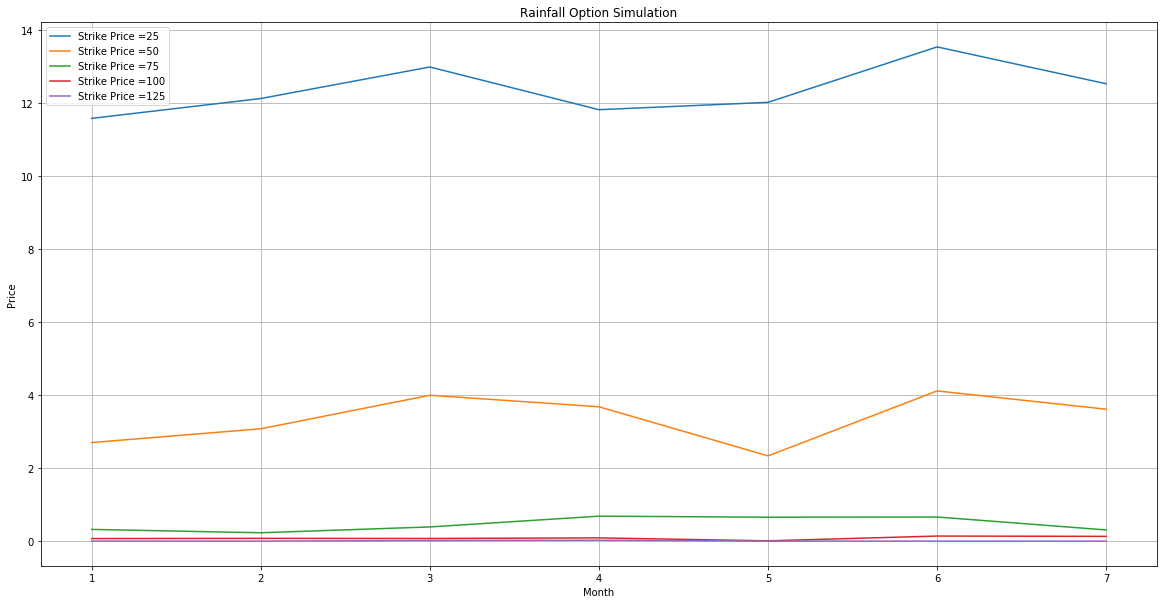

In [73]:
strikePrices = [25,50,75,100,125]
finalComparison(iterations=500,
                  startDate='2017-01-01',
                  transitionsParametersDry= transitionsParametersDry ,
                  transitionsParametersWet = transitionsParametersWet,
                  amountParametersGamma = amountParametersGamma,
                  strikePrices=strikePrices,
                  interestRates= 0.0235 )

/home/jesus/.local/lib/python3.5/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


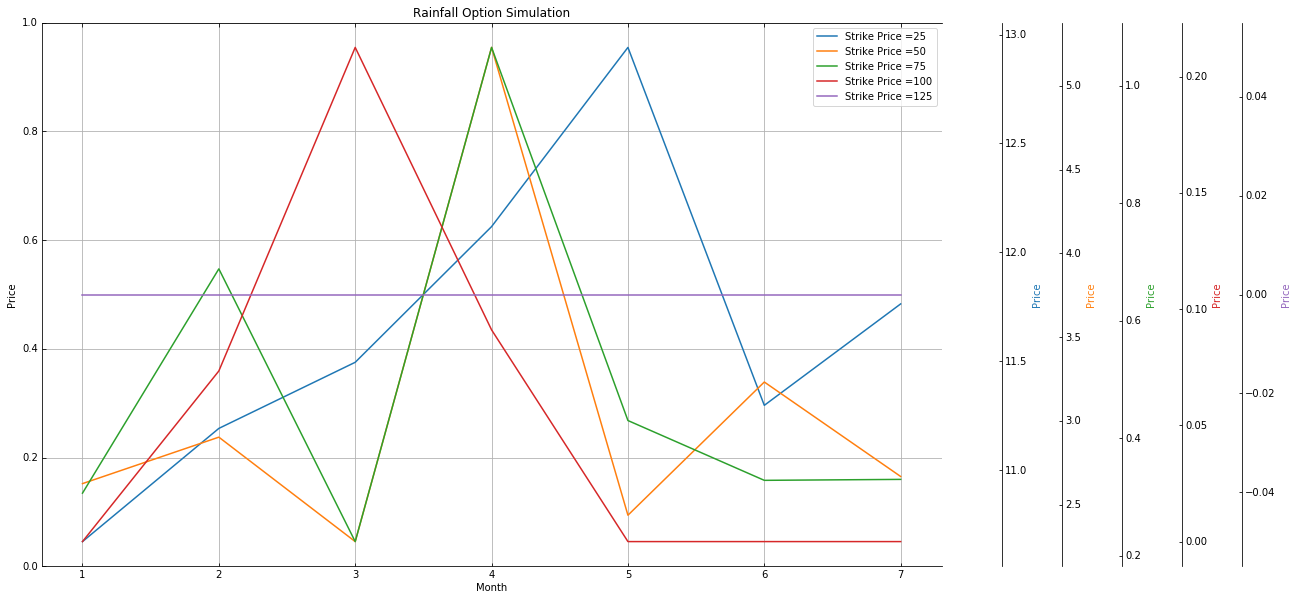

In [81]:
strikePrices = [25,50,75,100,125]
finalComparisonGraph(iterations=100,
                  startDate='2017-01-01',
                  transitionsParametersDry= transitionsParametersDry ,
                  transitionsParametersWet = transitionsParametersWet,
                  amountParametersGamma = amountParametersGamma,
                  strikePrices=strikePrices,
                  interestRates= 0.0235 )

/home/jesus/.local/lib/python3.5/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


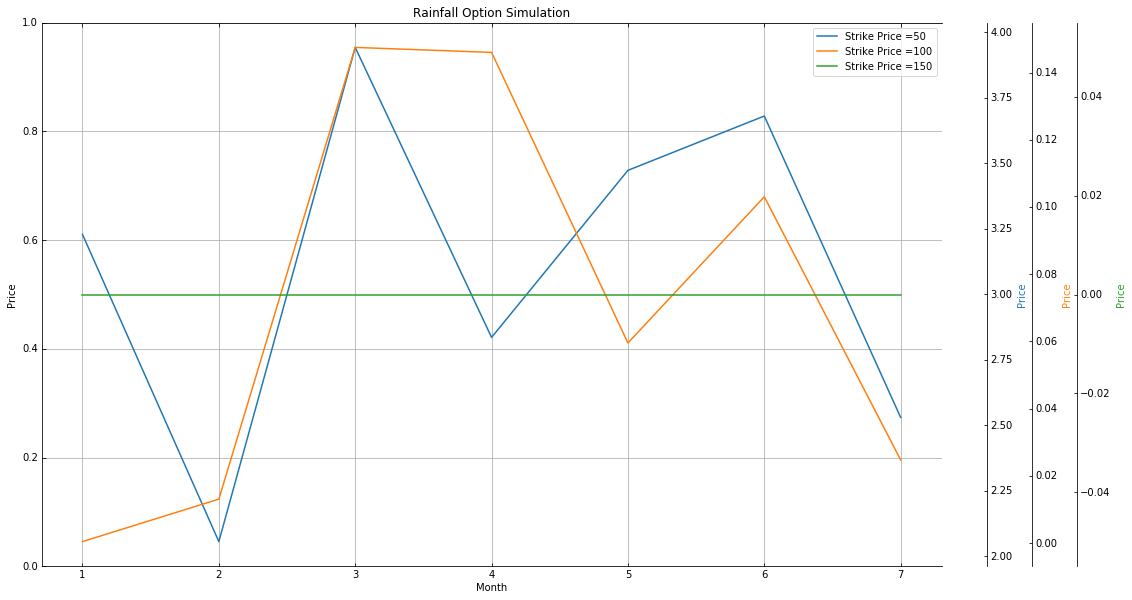

In [83]:
strikePrices = [50,100,150]
finalComparisonGraph(iterations=200,
                  startDate='2017-01-01',
                  transitionsParametersDry= transitionsParametersDry ,
                  transitionsParametersWet = transitionsParametersWet,
                  amountParametersGamma = amountParametersGamma,
                  strikePrices=strikePrices,
                  interestRates= 0.0235 )

/home/jesus/.local/lib/python3.5/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


NameError: name 'oneRun_S' is not defined

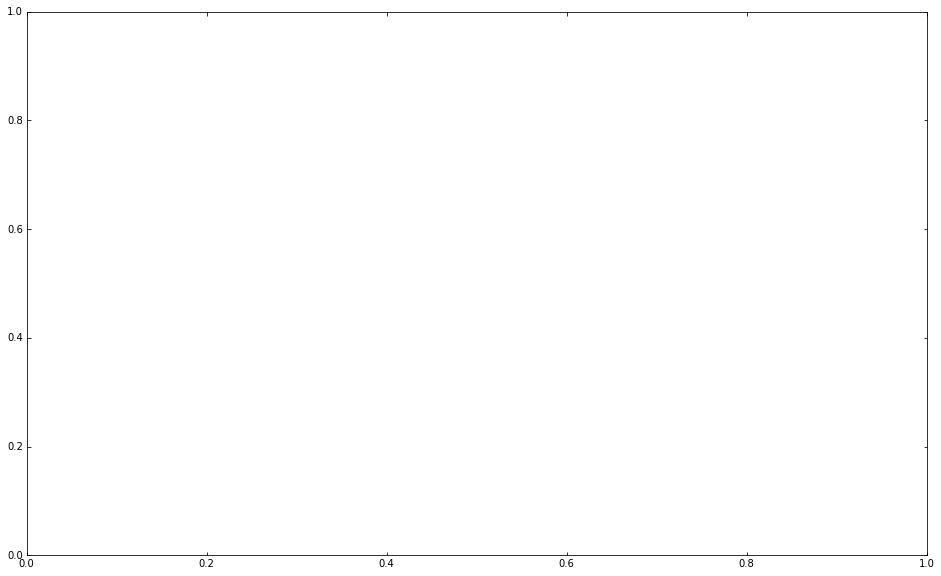

In [95]:
strikePrices = [25,50,75,100,125]
finalComparisonGraph_S(iterations=100,
                  startDate='2017-01-01',
                  transitionsParametersDry= transitionsParametersDry ,
                  transitionsParametersWet = transitionsParametersWet,
                  amountParametersGamma = amountParametersGamma,
                  strikePrices=strikePrices,
                  interestRates= 0.0235 )

In [ ]:
strikePrices = [50,100,150]
finalComparisonGraph(iterations=200,
                  startDate='2017-04-01',
                  transitionsParametersDry= transitionsParametersDry ,
                  transitionsParametersWet = transitionsParametersWet,
                  amountParametersGamma = amountParametersGamma,
                  strikePrices=strikePrices,
                  interestRates= 0.0235 )